# 목표
- 손글씨를 분류하는 모델을 만들어보자.
- 예측의 불확실성을 확인해보자.
- 이미지 데이터 형태의 이해
- 다양한 분류평가지표의 이해

# 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
digit_train = pd.read_csv("./data/digit_train.csv")
digit_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


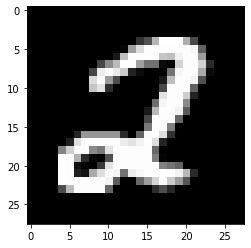

In [3]:
#이미지 확인
img = digit_train.iloc[444,1:]
img_reshape = img.values.reshape(28,28)
plt.imshow(img_reshape, cmap='gray')

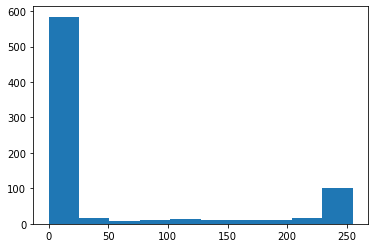

In [4]:
# 데이터 분포 확인
plt.hist(img)
plt.show()

In [5]:
# 손글씨(정답) 종류
digit_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

#### 훈련용 데이터와 검증용 데이터 분리

In [3]:
X = digit_train.iloc[:, 1:]
y = digit_train.label

In [4]:
X_train,X_val,y_train,y_val = train_test_split(X,y,  test_size=0.3,
                                              random_state=728)

#### 모델링
- KNN
- DecisionTree
- LogisticRegression
- SVM

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # 분류용 SVM 모델
from sklearn.linear_model import SGDClassifier # 경사하강법 적용 선형분류모델


In [9]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
print("훈련정확도 :", knn_model.score(X_train,y_train))
print("테스트정확도 :", knn_model.score(X_val,y_val))

훈련정확도 : 0.9754761904761905
테스트정확도 : 0.9671428571428572


In [10]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
print("훈련정확도 :", tree_model.score(X_train,y_train))
print("테스트정확도 :", tree_model.score(X_val,y_val))

훈련정확도 : 1.0
테스트정확도 : 0.8467460317460317


In [11]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
print("훈련정확도 :", log_model.score(X_train,y_train))
print("테스트정확도 :", log_model.score(X_val,y_val))

훈련정확도 : 0.9423469387755102
테스트정확도 : 0.9137301587301587


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
svc_model = LinearSVC()
svc_model.fit(X_train,y_train)
print("훈련정확도 :", svc_model.score(X_train,y_train))
print("테스트정확도 :", svc_model.score(X_val,y_val))

훈련정확도 : 0.8791836734693877
테스트정확도 : 0.8538095238095238


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [13]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
print("훈련정확도 :", sgd_model.score(X_train,y_train))
print("테스트정확도 :", sgd_model.score(X_val,y_val))

훈련정확도 : 0.8976190476190476
테스트정확도 : 0.8705555555555555


### 교차검증 활용 점수 확인

In [11]:
from sklearn.model_selection import cross_val_score

In [15]:
knn_model2 = KNeighborsClassifier()
tree_model2 = DecisionTreeClassifier()
log_model2 = LogisticRegression()
svc_model2 = LinearSVC()
sgd_model2 = SGDClassifier()

In [16]:
knn_score = cross_val_score(knn_model2,X,y,cv=3)
tree_score = cross_val_score(tree_model2,X,y,cv=3)
log_score = cross_val_score(log_model2,X,y,cv=3)
svc_score = cross_val_score(svc_model2,X,y,cv=3)
sgd_score = cross_val_score(sgd_model2,X,y,cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [17]:
print("knn교차검증결과 : ", knn_score.mean())
print("tree교차검증결과 : ", tree_score.mean())
print("log교차검증결과 : ", log_score.mean())
print("svc교차검증결과 : ", svc_score.mean())
print("sgd교차검증결과 : ", sgd_score.mean())

knn교차검증결과 :  0.9642142857142857
tree교차검증결과 :  0.8465714285714285
log교차검증결과 :  0.9128095238095238
svc교차검증결과 :  0.8685714285714287
sgd교차검증결과 :  0.8729761904761905


#### 스케일링 추가
- minmax 스케일러 활용

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler() # 스케일러 객체생성
scaler.fit(X) # 스케일링 기준값 찾기

MinMaxScaler()

In [8]:
X_scaled = scaler.transform(X) #스케일링 실시

In [9]:
knn_model3 = KNeighborsClassifier()
tree_model3 = DecisionTreeClassifier()
log_model3 = LogisticRegression()
svc_model3 = LinearSVC()
sgd_model3 = SGDClassifier()

In [12]:
knn_score = cross_val_score(knn_model3,X_scaled,y,cv=3)
tree_score = cross_val_score(tree_model3,X_scaled,y,cv=3)
log_score = cross_val_score(log_model3,X_scaled,y,cv=3)
svc_score = cross_val_score(svc_model3,X_scaled,y,cv=3)
sgd_score = cross_val_score(sgd_model3,X_scaled,y,cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [13]:
print("knn교차검증결과 : ", knn_score.mean())
print("tree교차검증결과 : ", tree_score.mean())
print("log교차검증결과 : ", log_score.mean())
print("svc교차검증결과 : ", svc_score.mean())
print("sgd교차검증결과 : ", sgd_score.mean())

knn교차검증결과 :  0.9641904761904762
tree교차검증결과 :  0.8472142857142857
log교차검증결과 :  0.9162857142857144
svc교차검증결과 :  0.9076904761904762
sgd교차검증결과 :  0.9103571428571429


### 예측의 불확실성 확인
- 분류모델들은 예측결과를 정하기전에 항상 확률을 계산한다
- 분류모델이 예측한 값이 같더라도 확신의 정도(불확실성)가 전부 다른다

In [17]:
logi_model4 = LogisticRegression()
logi_model4.fit(X_train,y_train)
pre = logi_model4.predict(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
pre

array([7, 8, 0, ..., 1, 8, 6], dtype=int64)

In [26]:
pre_proba = logi_model4.predict_proba(X_val)
pre_proba[8]

array([7.66478527e-07, 2.30145961e-10, 1.91250270e-01, 8.01043916e-01,
       7.31724848e-06, 6.37679330e-03, 1.25273942e-07, 1.16707218e-14,
       1.32081156e-03, 3.78933284e-10])

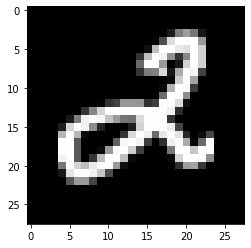

In [27]:
plt.imshow(X_val.iloc[8].values.reshape(28,28), cmap='gray')

# 모델 평가
- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1 스코어
- ROC AUC

In [15]:
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import classification_report # 분류평가지표를 리포팅

In [18]:
# confusion_matrix(실제정답, 예측값)
confusion_matrix(y_val, pre)
# 0인데 0이라고 예측 = 1160
# 1인데 1이라고 예측 = 1374 ~~~

array([[1160,    1,    2,    4,    0,    7,   14,    4,    2,    1],
       [   0, 1374,    1,    5,    1,    3,    2,    2,   19,    1],
       [   9,   23, 1140,   29,   12,    4,   12,    9,   35,   12],
       [   4,    2,   38, 1194,    0,   34,    2,   12,   32,   16],
       [   4,    3,   11,    2, 1091,    2,   10,    5,   13,   50],
       [  19,    3,    5,   43,    8,  939,   26,   10,   37,   16],
       [  12,    2,   11,    1,   12,   16, 1198,    0,    6,    1],
       [   3,    2,   18,    7,   12,    1,    3, 1275,    4,   47],
       [  19,   28,   11,   31,   12,   36,    4,    9, 1074,   23],
       [  10,    3,    2,   15,   36,    8,    0,   49,   12, 1068]],
      dtype=int64)

In [19]:
# classification_report(실제값, 예측값) 문자열로 나오기때문에 print로 감싸줘야함
print(classification_report(y_val, pre))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1195
           1       0.95      0.98      0.96      1408
           2       0.92      0.89      0.90      1285
           3       0.90      0.90      0.90      1334
           4       0.92      0.92      0.92      1191
           5       0.89      0.85      0.87      1106
           6       0.94      0.95      0.95      1259
           7       0.93      0.93      0.93      1372
           8       0.87      0.86      0.87      1247
           9       0.86      0.89      0.88      1203

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



# 모델 활용하기

In [14]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [30]:
from PIL import image

ImportError: cannot import name 'image' from 'PIL' (C:\ProgramData\Anaconda3\lib\site-packages\PIL\__init__.py)